In [97]:
#dependents
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from scipy import stats

#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()

#get length of imprisonment dataframe entries 
Imprisonment_length = len(ImprisonmentData["resources"])

#initialize lists for data pull from request
YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(int(ImprisonmentData["resources"][i]["Year"]))
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imprisonment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,"Black, non-Hispanic",None,104880,2732
104,2000,"Black, non-Hispanic",Male,101521,5358
156,2000,"Black, non-Hispanic",Female,3500,180
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,"Other race, non-Hispanic",None,15350,826
130,2000,"Other race, non-Hispanic",Male,14504,1557
182,2000,"Other race, non-Hispanic",Female,869,94
39,2000,"White, non-Hispanic",None,59129,345


In [98]:
#replacing all races with standard races
imprisonmentDf = imprisonmentDf.replace("White, non-Hispanic", "Caucasian")
imprisonmentDf = imprisonmentDf.replace("Black, non-Hispanic", "African American")
imprisonmentDf = imprisonmentDf.replace("Other race, non-Hispanic", "Other")
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,African American,None,104880,2732
104,2000,African American,Male,101521,5358
156,2000,African American,Female,3500,180
39,2000,Caucasian,None,59129,345
91,2000,Caucasian,Male,55602,639
143,2000,Caucasian,Female,3498,41
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,Other,None,15350,826


In [99]:
#CREATE LIST OF RACES
raceList = ["African American", "Caucasian", "Hispanic", "Other"]
raceList

['African American', 'Caucasian', 'Hispanic', 'Other']

In [100]:
#Pull CSV - Drop Out Data
dropOut_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_year_and_race.csv")
dropOut_df = dropOut_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_df = dropOut_df.set_index("Year")
print(dropOut_df.columns)
#reorder columns
dropOut_df = dropOut_df[raceList]

#Pull CSV - 2000-2007
dropOut_00_07_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2000-2007).csv")
dropOut_00_07_df = dropOut_00_07_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_00_07_df = dropOut_00_07_df.set_index("Year")
#reorder columns
dropOut_00_07_df = dropOut_00_07_df[raceList]

#Pull CSV - Drop Out Data
dropOut_08Plus_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2008+).csv")
dropOut_08Plus_df = dropOut_08Plus_df.rename(columns={"Dropout White" : "Caucasian", "Dropout Black" : "African American", "Dropout Hispanic" : "Hispanic", "Dropout other" : "Other"})
dropOut_08Plus_df = dropOut_08Plus_df.set_index("Year")
#reorder columns
dropOut_08Plus_df = dropOut_08Plus_df[raceList]
print(dropOut_df)
print(dropOut_00_07_df)
print(dropOut_08Plus_df)

Index(['Caucasian', 'African American', 'Hispanic', 'Other'], dtype='object')
      African American  Caucasian  Hispanic  Other
Year                                              
2000              28.8       18.2      43.3  22.95
2001              29.0       17.9      42.8  22.80
2002              27.5       18.5      41.6  23.00
2003              27.7       17.6      39.7  19.95
2004              25.4       17.2      39.0  25.75
2005              26.1       16.8      37.9  22.55
2006              23.3       16.6      37.3  21.15
2007              23.6       17.2      34.6  23.80
2008              24.1       15.6      33.0  23.90
2009              24.0       15.4      31.2  17.25
2010              23.6       15.5      30.8  20.05
2011              23.7       15.9      28.8  19.85
2012              21.3       15.8      26.5  18.30
      African American  Caucasian  Hispanic  Other
Year                                              
2000              28.8       18.2      43.3  22.95
2001

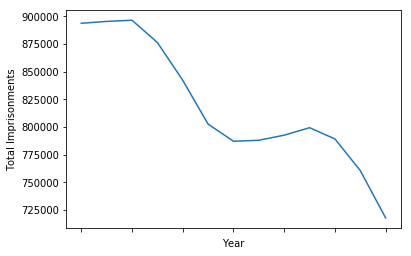

In [101]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
imprisonmentGraph_totalImprisonments = imprisonmentDf_totalImprisonments.unstack(level=-1).plot(kind="line", legend=False)
imprisonmentGraph_totalImprisonments.set_ylabel("Total Imprisonments")
imprisonmentGraph_totalImprisonments.set_xlabel("Year")
plt.show()

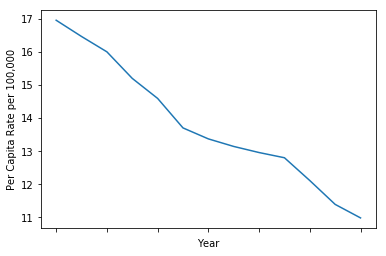

In [102]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS - PER CAPITA
imprisonmentDf_totalImprisonmentsPerCapita = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Per Capita Rate per 100,000"].sum()/100000*100)
imprisonmentGraph_totalImprisonmentsPerCapita = imprisonmentDf_totalImprisonmentsPerCapita.unstack(level=-1).plot(kind="line", legend=False)
imprisonmentGraph_totalImprisonmentsPerCapita.set_ylabel("Per Capita Rate per 100,000")
imprisonmentGraph_totalImprisonmentsPerCapita.set_xlabel("Year")
plt.show()

In [103]:
#GRAPH IMPRISONMENTS PER RACE

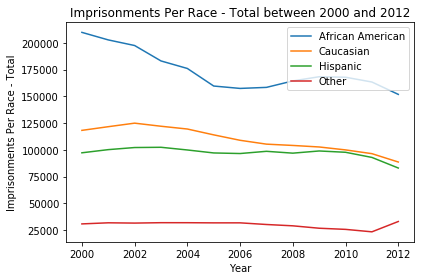

In [104]:
#GRAPH TOTAL IMPRISONMENTS PER RACE
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_total_PerRace = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_total_PerRace.reset_index(level=0, inplace=True)
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace.set_index('Year')
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace.rename_axis("", axis="columns")
imprisonmentDf_total_PerRace = imprisonmentDf_total_PerRace[raceList]

#write CSV
imprisonmentDf_total_PerRace.to_csv("../CSVs/imprisonmentDf_total_PerRace.csv")

#plot
for i in raceList:
    plt.plot(imprisonmentDf_total_PerRace.index, imprisonmentDf_total_PerRace[i])

#format
plt.legend(labels=imprisonmentDf_total_PerRace.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race - Total")
plt.title("Imprisonments Per Race - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race - Total between 2000 and 2012.png')
#imprisonmentDf_total_PerRace

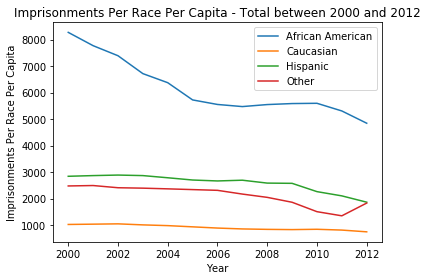

In [105]:
#GRAPH TOTAL IMPRISONMENTS PER RACE PER CAPITA %
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_perRace_perCapita = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Per Capita Rate per 100,000"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_perRace_perCapita.reset_index(level=0, inplace=True)
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.set_index('Year')
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.rename_axis("", axis="columns")
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita[raceList]

#write CSV
imprisonmentDf_perRace_perCapita.to_csv("../CSVs/imprisonmentDf_perRace_perCapita.csv")

#plot
for i in raceList:
    plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i])

#format
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita")
plt.title("Imprisonments Per Race Per Capita - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race Per Capita - Total between 2000 and 2012.png')
#imprisonmentDf_perRace_perCapita

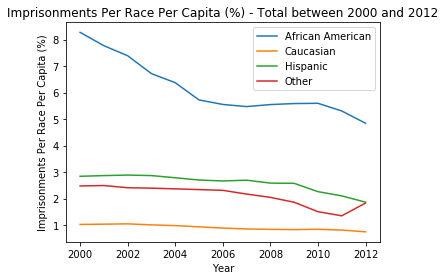

In [106]:
#GRAPH TOTAL IMPRISONMENTS PER RACE PER CAPITA %
for i in raceList:
    plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i]/1000)
    
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita (%)")
plt.title("Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012")
plt.tight_layout()
plt.savefig('../Graphs/Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012.png')

In [107]:
#GRAPH TOTAL IMPRISONMENTS

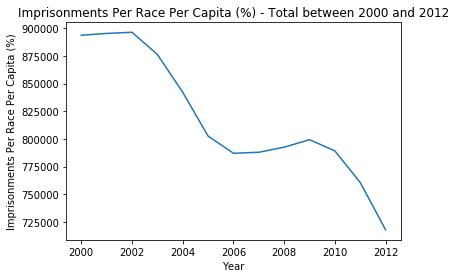

In [108]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS COMBINED
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
plt.plot(imprisonmentDf_totalImprisonments.index, imprisonmentDf_totalImprisonments["Count"],)
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race Per Capita (%)")
plt.title("Imprisonments Per Race Per Capita (%) - Total between 2000 and 2012")
plt.savefig('../Graphs/Imprisonments Total - Total between 2000 and 2012.png')


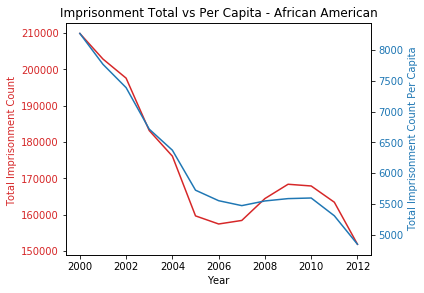

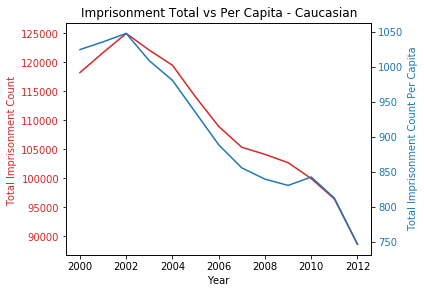

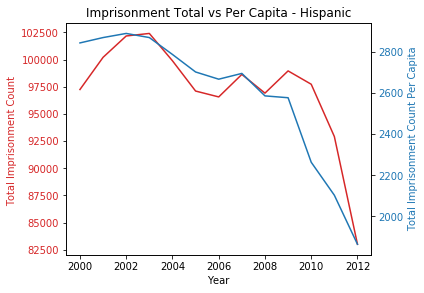

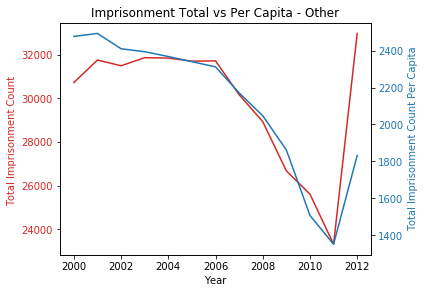

In [109]:
#IMPRINSONMENTS TOTAL VS PER CAPITA - ALL 4

for i in raceList:
    saveTitle = "Imprisonment Total vs Per Capita - " + i
    saveDestination = "../Graphs/" + saveTitle
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Imprisonment Count ', color=color)
    ax1.plot(imprisonmentDf_total_PerRace.index, imprisonmentDf_total_PerRace[i], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Total Imprisonment Count Per Capita', color=color)  # we already handled the x-label with ax1
    ax2.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(saveTitle)

    fig.savefig(saveDestination)

[]

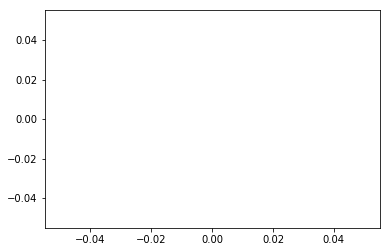

In [110]:
plt.plot()

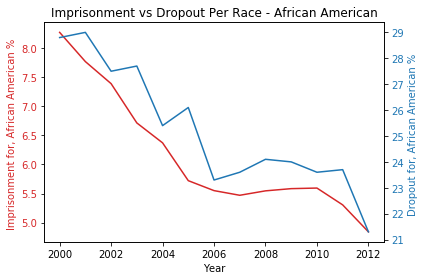

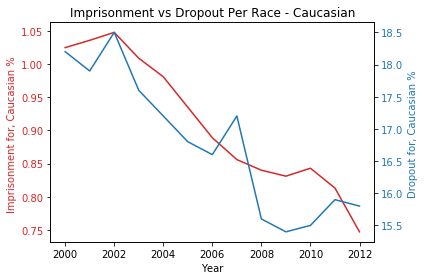

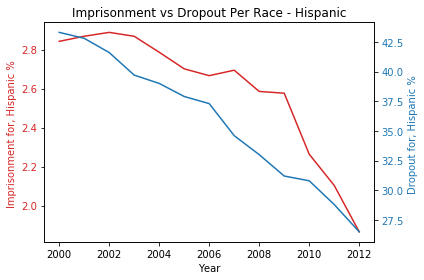

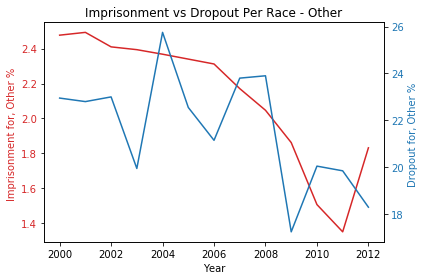

In [111]:
#IMPRISONMENTS VS DROPOUTS - ALL 4
for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Dropout Per Race - " + raceList[i]
    ylable1 = "Imprisonment for, " + raceList[i] + " % "
    ylable2 = "Dropout for, " + raceList[i] + " % "
    saveDestination = "../Graphs/" + saveTitle

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(ylable1, color=color)
    ax1.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita[raceList[i]]/1000, color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(ylable2, color=color)  # we already handled the x-label with ax1
    ax2.plot(dropOut_df.index, dropOut_df[raceList[i]], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(saveTitle)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    fig.savefig(saveDestination)

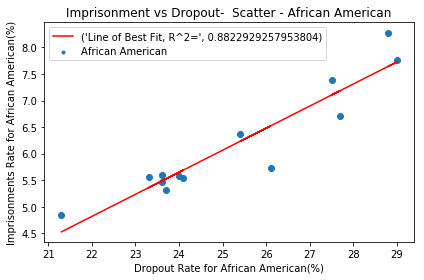

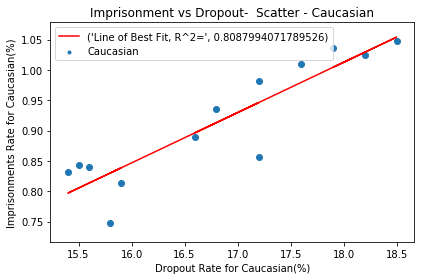

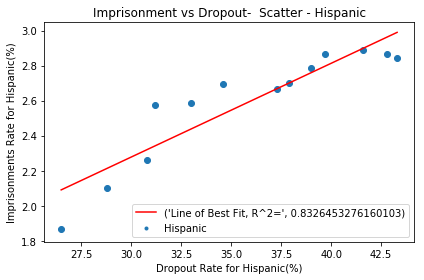

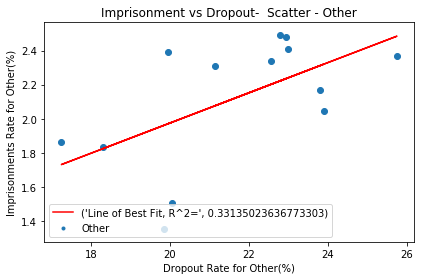

In [112]:
for i in range(len(raceList)):
    saveTitle = "Imprisonment vs Dropout-  Scatter - " + raceList[i]
    saveDestination = "../Graphs/" + saveTitle

    #plot scatter
    plt.scatter(dropOut_df[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #create linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df[raceList[i]], imprisonmentDf_perRace_perCapita[raceList[i]]/1000)
    #plot line of best fit
    plt.plot(dropOut_df[raceList[i]], intercept + slope*dropOut_df[raceList[i]], 'r', label='fitted line')

    #format graph
    xlabel = "Dropout Rate for " + raceList[i] + "(%)"
    plt.xlabel(xlabel)
    ylabel = "Imprisonments Rate for " + raceList[i] + "(%)"
    plt.ylabel(ylabel)
    rValueLab = "Line of Best Fit, R^2=", r_value**2
    plt.legend(labels=[rValueLab, raceList[i]], loc="best", markerscale=.5)
    #plt.text(30, 0, r_value**2, fontdict=None, withdash=False)

    plt.title(saveTitle)
    plt.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.savefig(saveDestination)
    plt.show()

In [116]:
#imprisonmentDf_00_07_ = imprisonmentDf.loc[df["Year"] < 2008, ["column1”, "columnToFilter”, “”column3, “…”]]


In [117]:
#plot.scatter(x,y)

#dropOut_00_07_df

In [118]:
#imprisonmentDf_totalImprisonments

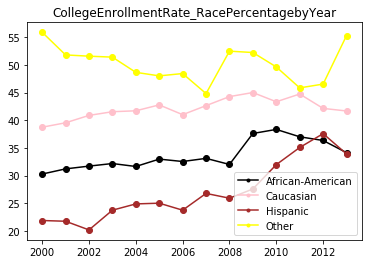

In [131]:
CollegeEnrollmentRate_RacePercentagebyYear = pd.read_csv("../CSVs/College Enrollment Rate - RacePercentage by Year.csv")
CollegeEnrollmentRate_RacePercentagebyYear
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(CollegeEnrollmentRate_RacePercentagebyYear["Year"], CollegeEnrollmentRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=["African-American", "Caucasian", "Hispanic", "Other"], loc="best", markerscale=.5)
plt.title("CollegeEnrollmentRate_RacePercentagebyYear")
plt.savefig('../Graphs/CollegeEnrollmentRate_RacePercentagebyYear.png')
plt.show()

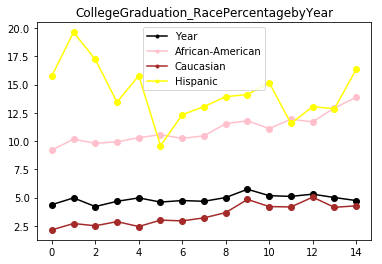

In [132]:
CollegeGraduation_RacePercentagebyYear = pd.read_csv("../CSVs/College Graduation - RacePercentage by Year.csv")
CollegeGraduation_RacePercentagebyYear.set_index("Year")
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(CollegeGraduation_RacePercentagebyYear.index, CollegeGraduation_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=CollegeGraduation_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("CollegeGraduation_RacePercentagebyYear")
plt.savefig('../Graphs/CollegeGraduation_RacePercentagebyYear.png')
plt.show()

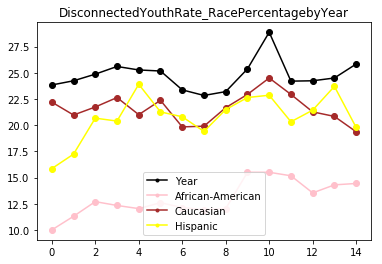

In [133]:
DisconnectedYouthRate_RacePercentagebyYear = pd.read_csv("../CSVs/Disconnected Youth Rate - RacePercentage by Year.csv")
DisconnectedYouthRate_RacePercentagebyYear.set_index("Year")
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(DisconnectedYouthRate_RacePercentagebyYear.index, DisconnectedYouthRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=DisconnectedYouthRate_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("DisconnectedYouthRate_RacePercentagebyYear")
plt.savefig('../Graphs/DisconnectedYouthRate_RacePercentagebyYear.png')
plt.show()

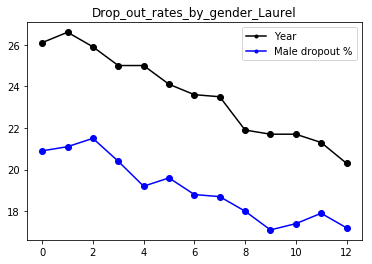

In [134]:
Drop_out_rates_by_gender_Laurel = pd.read_csv("../CSVs/Drop_out_rates_by_gender_Laurel.csv")
Drop_out_rates_by_gender_Laurel.set_index("Year")
plt.plot(Drop_out_rates_by_gender_Laurel.index, Drop_out_rates_by_gender_Laurel["Male dropout %"], '-o', color='black')
plt.plot(Drop_out_rates_by_gender_Laurel.index, Drop_out_rates_by_gender_Laurel["Female dropout %"], '-o', color='blue')
plt.legend(labels=Drop_out_rates_by_gender_Laurel.columns, loc="best", markerscale=.5)
plt.title("Drop_out_rates_by_gender_Laurel")
plt.savefig('../Graphs/Drop_out_rates_by_gender_Laurel.png')
plt.show()

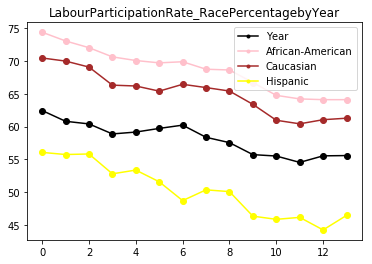

In [135]:
LabourParticipationRate_RacePercentagebyYear = pd.read_csv("../CSVs/Labour Participation Rate - RacePercentage by Year.csv")
LabourParticipationRate_RacePercentagebyYear.set_index("Year")
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["African-American"], '-o', color='black')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Caucasian"], '-o', color='pink')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Hispanic"], '-o', color='brown')
plt.plot(LabourParticipationRate_RacePercentagebyYear.index, LabourParticipationRate_RacePercentagebyYear["Other"], '-o', color='yellow')
plt.legend(labels=LabourParticipationRate_RacePercentagebyYear.columns, loc="best", markerscale=.5)
plt.title("LabourParticipationRate_RacePercentagebyYear")
plt.savefig('../Graphs/LabourParticipationRate_RacePercentagebyYear.png')
plt.show()

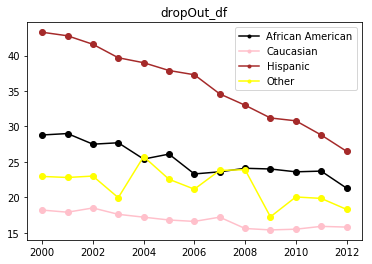

In [136]:
dropOut_df
plt.plot(dropOut_df.index, dropOut_df["African American"], '-o', color='black')
plt.plot(dropOut_df.index, dropOut_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_df.index, dropOut_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_df.index, dropOut_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_year_and_race")
plt.savefig('../Graphs/Total_drop_out_rates_by_year_and_race.png')
plt.show()

In [ ]:
dropOut_00_07_df
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["African American"], '-o', color='black')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_00_07_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_race")
plt.savefig('../Graphs/Total_drop_out_rates_by_race(2000-2007).png')
plt.show()


In [ ]:
dropOut_08Plus_df
plt.plot(dropOut_08Plus_df.index, dropOut_08Plus_df["African American"], '-o', color='black')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Caucasian"], '-o', color='pink')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Hispanic"], '-o', color='brown')
plt.plot(dropOut_00_07_df.index, dropOut_00_07_df["Other"], '-o', color='yellow')
plt.legend(labels=dropOut_00_07_df.columns, loc="best", markerscale=.5)
plt.title("Total_drop_out_rates_by_race")
plt.savefig('../Graphs/Total_drop_out_rates_by_race(2000-2007).png')
plt.show()